<a href="https://colab.research.google.com/github/Manasvivek/FMML_projects_and_labs/blob/main/module4_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'y')

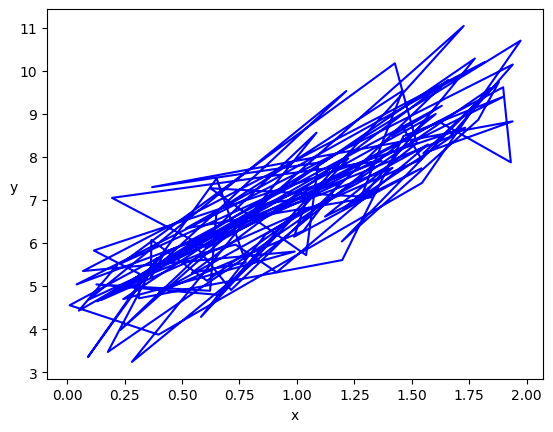

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X=2 * np.random.rand(100,1)
y=4 + 3*X +np.random.randn(100,1)
plt.plot(X,y,'b')
plt.xlabel("x")
plt.ylabel("y",rotation=0)
# Batch gradient descent

In [9]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.175
y_pred[1]: 2.805
Final error: 4035.310


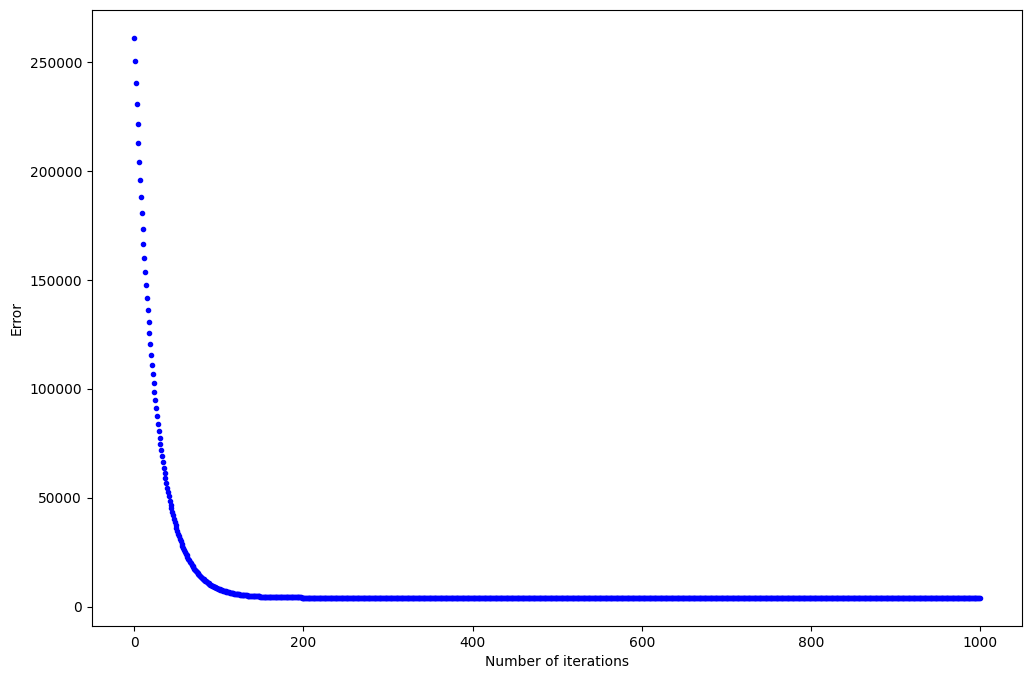

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

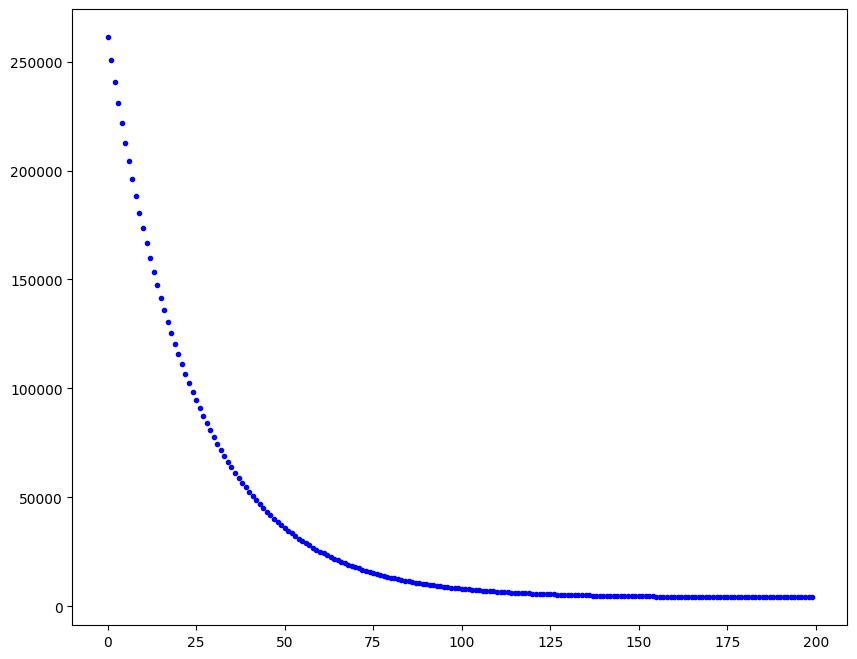

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

In [13]:
# stochastic gradient descent:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.125
y_pred[1]: 2.735
Final error: 44.766


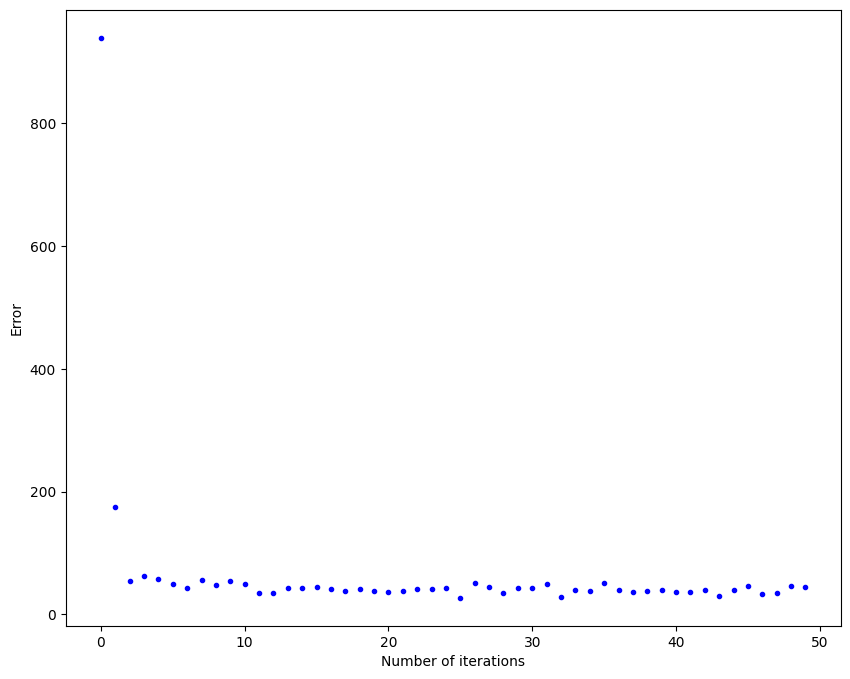

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [19]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=1):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.153
y_pred[1]: 2.825
Final error: 40.298


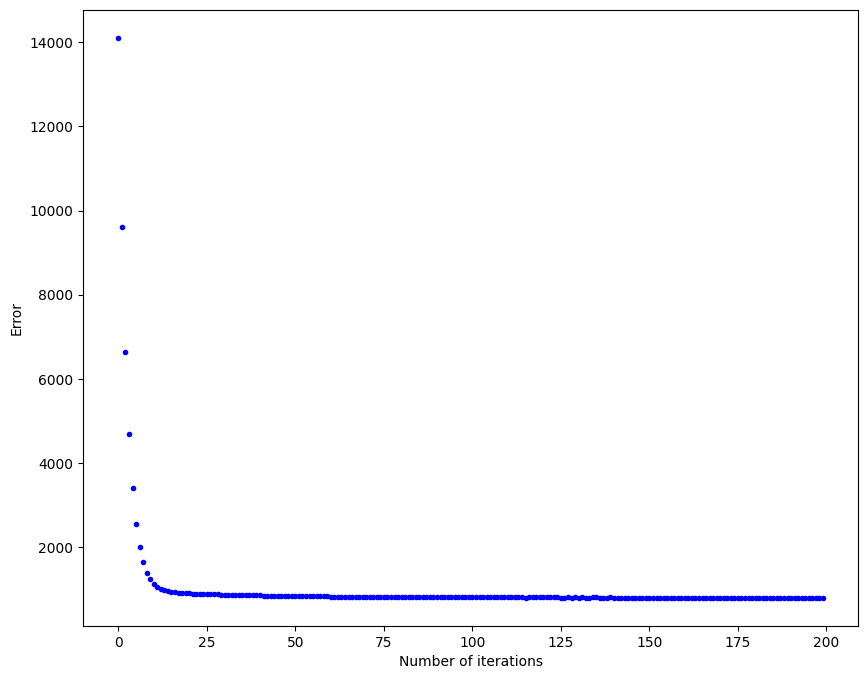

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

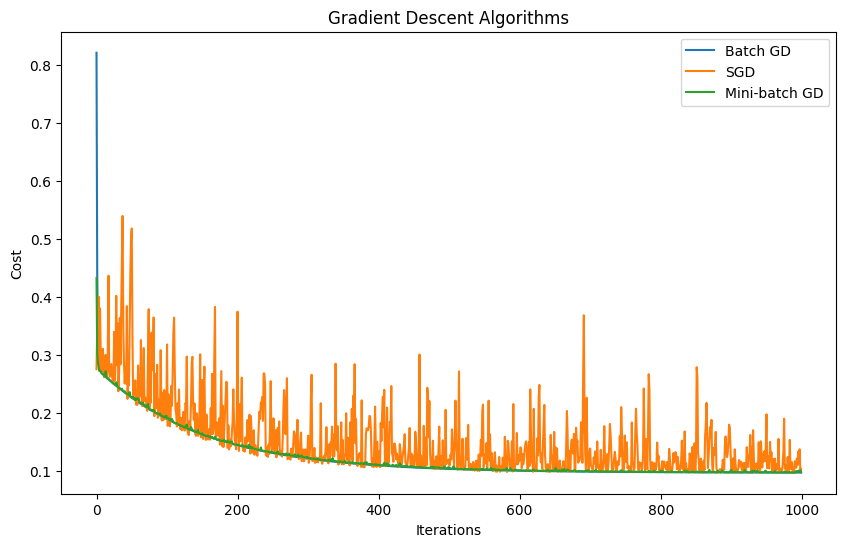

Optimized weights (Batch GD): [ 0.61617475 -0.78834042]
Optimized bias (Batch GD): -0.16444332980534138
Optimized weights (SGD): [ 0.61239804 -0.81368825]
Optimized bias (SGD): [-0.17851964]
Optimized weights (Mini-batch GD): [ 0.6227752  -0.78728329]
Optimized bias (Mini-batch GD): -0.1652851879030495


In [21]:
# Things to try out answers:
# 1.Ans:
# If we change the batch size in mini-batch gradient descent:
# 1)if we increase the batch size the error becomes close as the error in batch gradient descent.
# 2) if we decrease the batch size the error becomes close as the error in stochastic gradient descent.


# 2.Ans:
# Testing all three gradient descents on iris data set

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs Batch Gradient Descent.

    Args:
        X: Training data (features)
        y: Target values
        learning_rate: Learning rate
        iterations: Number of iterations

    Returns:
        w: Optimized weights
        b: Optimized bias
        cost_history: History of cost values
    """

    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for i in range(iterations):
        y_pred = np.dot(X, w) + b
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = (1 / (2 * num_samples)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

    return w, b, cost_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs Stochastic Gradient Descent.

    Args:
        X: Training data (features)
        y: Target values
        learning_rate: Learning rate
        iterations: Number of iterations

    Returns:
        w: Optimized weights
        b: Optimized bias
        cost_history: History of cost values
    """

    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for i in range(iterations):
        random_index = np.random.randint(num_samples)
        x_sample = X[random_index].reshape(1, -1)
        y_sample = y[random_index]
        y_pred = np.dot(x_sample, w) + b
        dw = x_sample.T * (y_pred - y_sample)
        db = y_pred - y_sample

        # Fix: Reshape dw to match the shape of w for proper subtraction
        w -= learning_rate * dw.reshape(w.shape)
        b -= learning_rate * db

        # Calculate cost on the entire dataset for comparison
        y_pred_all = np.dot(X, w) + b
        cost = (1 / (2 * num_samples)) * np.sum((y_pred_all - y) ** 2)
        cost_history.append(cost)

    return w, b, cost_history

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, iterations=1000):
    """
    Performs Mini-batch Gradient Descent.

    Args:
        X: Training data (features)
        y: Target values
        batch_size: Size of the mini-batch
        learning_rate: Learning rate
        iterations: Number of iterations

    Returns:
        w: Optimized weights
        b: Optimized bias
        cost_history: History of cost values
    """

    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0
    cost_history = []

    for i in range(iterations):
        indices = np.random.choice(num_samples, batch_size, replace=False)
        x_batch = X[indices]
        y_batch = y[indices]
        y_pred = np.dot(x_batch, w) + b
        dw = (1 / batch_size) * np.dot(x_batch.T, (y_pred - y_batch))
        db = (1 / batch_size) * np.sum(y_pred - y_batch)
        w -= learning_rate * dw
        b -= learning_rate * db
        # Calculate cost on the entire dataset for comparison
        y_pred_all = np.dot(X, w) + b
        cost = (1 / (2 * num_samples)) * np.sum((y_pred_all - y) ** 2)
        cost_history.append(cost)

    return w, b, cost_history

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use two features for simplicity
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform gradient descent
w_batch, b_batch, cost_history_batch = batch_gradient_descent(X_train, y_train)
w_sgd, b_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train)
w_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_train, y_train)

# Plot the cost histories
plt.figure(figsize=(10, 6))
plt.plot(cost_history_batch, label='Batch GD')
plt.plot(cost_history_sgd, label='SGD')
plt.plot(cost_history_mini_batch, label='Mini-batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Algorithms')
plt.legend()
plt.show()

print("Optimized weights (Batch GD):", w_batch)
print("Optimized bias (Batch GD):", b_batch)
print("Optimized weights (SGD):", w_sgd)
print("Optimized bias (SGD):", b_sgd)
print("Optimized weights (Mini-batch GD):", w_mini_batch)
print("Optimized bias (Mini-batch GD):", b_mini_batch)

Ans : (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.